In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1 = np.loadtxt("TAUXcurlyear.out")
data2 = np.loadtxt("TAUYcurlyear.out")

In [3]:
data1.shape

(5770,)

In [5]:
12*130

1560

In [6]:
dd150 = data1[1560:]

In [10]:
dd150500 = dd150[:4200]

In [11]:
dd150500.shape

(4200,)

In [12]:
d4 = dd150500.reshape(350,12)
dmean = np.nanmean(d4,axis=1)

In [13]:
dmean.shape

(350,)

In [14]:
dave = np.nanmean(dmean)

In [15]:
fin = dmean - dave

In [17]:
ww2 = np.convolve(fin, np.ones((5,))/5, mode='valid')
mean = np.mean(ww2)

In [18]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

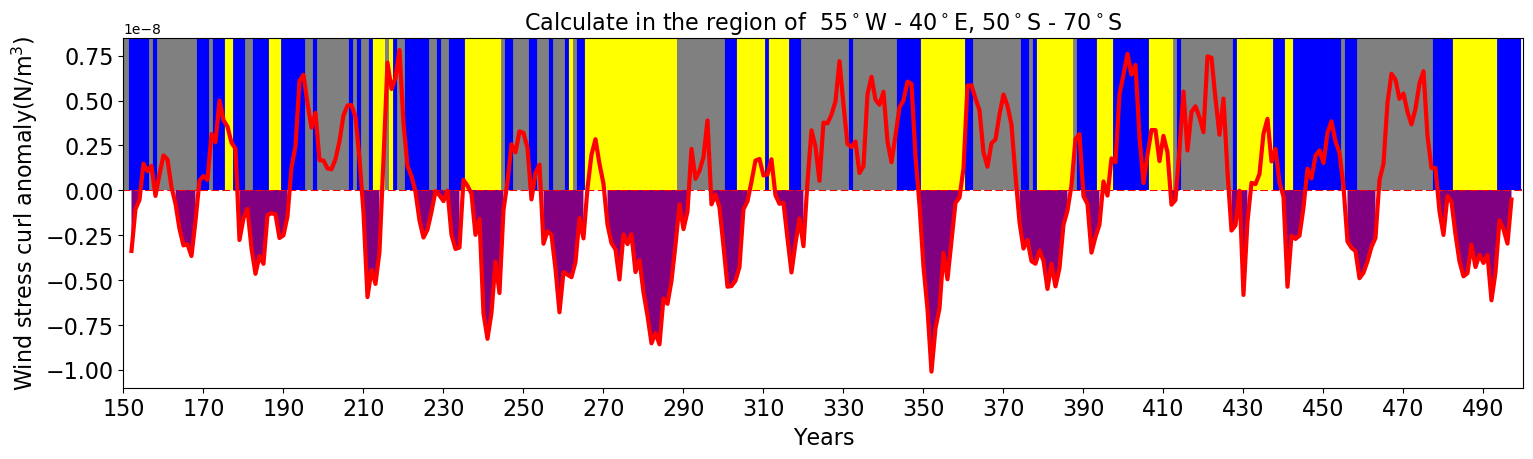

In [35]:
t = np.arange(2,348,1)
#t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,0.001*ww2,'red',linewidth=3)
plt.hlines(0.001*mean, 0, 350, colors = "red",linestyles = "dashed")
ax0.fill_between(t,0.001*mean,0.001*ww2,where=ww2 < mean,facecolor='purple', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxx, 0, 0.0000000085, colors = "grey",linewidth=3)
plt.vlines(mrpxx, 0, 0.0000000085, colors = "blue",linewidth=3)
plt.vlines(wspxx, 0, 0.0000000085, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.000000011, 0.0000000085),xlim=(0, 350))
ax0.set_title('Calculate in the region of  55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S',**my_font)
plt.savefig("windcurlwholeyear1.png",bbox_inches='tight',dpi=fig.dpi)

In [34]:
np.savetxt('windcurlyear1.out', ww2)